In [1]:
from importlib import reload
import datetime

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from modeling import environment as en
from modeling import agent as ag
from modeling import superviser as sv

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# pd.set_option('display.max_rows', 1000)

# 1.	Получение данных

In [2]:
type_instr = 'stock'

# Горизонт прогнозирования рабочих дней
horizon_days = 253

# Минимальное количество рабочих дней, для которых возможно посчитать доходность за минимальный период
min_hist_days = 253 # 124

# Минимальный период расчёта рентабельности для последующего перевода в годовую рентабельность
min_rent_days = 253 # 124

In [3]:
reload(en)
envir = en.Environment(
    date_start = pd.to_datetime('2010-01-01'), 
    cash_start = 1000000, 
    type_instr = type_instr, 
    file_extension = 'csv')

[*********************100%***********************]  1 of 1 completed


In [4]:
reload(ag)
agent = ag.Agent(envir)

In [5]:
import os
asd = pd.read_csv(os.path.join('3. Data preparation', type_instr, 'spr.csv'))
asd['fee'] = 0
asd.to_parquet('spr.parquet')

In [6]:
reload(sv)
suvis = sv.Superviser(envir, agent, type_instr)

In [7]:
date_start = pd.to_datetime('1994-01-01')
date_finish = pd.to_datetime('2020-01-01')
top_thres = 4
pow_st_dev = 0.5
den_pow = 253

envir.start(date_start = date_start, 
            date_finish = date_finish)
agent.start(top_thres = top_thres, 
            pow_st_dev = pow_st_dev, 
            den_pow = den_pow, 
            horizon_days = horizon_days,
            min_hist_days = min_hist_days,
            min_rent_days = min_rent_days) #, min_thres = min_thres
agent.action()

In [8]:
# Прогнозы инструментов история
agent.param_hist_df

,date,instr_id,profit_mean,total_1,profit_std,total_2
0,1995-02-01 00:00:00,SPY,1.008028,1.008028,1.024191,0.996052
0,1995-03-01 00:00:00,SPY,1.009693,1.009693,1.023953,0.997814
0,1995-04-01 00:00:00,SPY,1.015171,1.015171,1.028705,1.000907
0,1995-05-01 00:00:00,SPY,1.025926,1.025926,1.043721,1.004209
0,1995-06-01 00:00:00,SPY,1.03859,1.03859,1.057336,1.010038
...,...,...,...,...,...,...
0,2019-09-01 00:00:00,SPY,1.089016,1.089016,1.073899,1.050878
0,2019-10-01 00:00:00,SPY,1.08476,1.08476,1.074163,1.046643
0,2019-11-01 00:00:00,SPY,1.083658,1.083658,1.073538,1.045884
0,2019-12-01 00:00:00,SPY,1.087402,1.087402,1.072747,1.049884


In [9]:
# Требуемые доли инструментов в портфеле история
agent.part_req_hist_df  

,date,instr_id,part,bet_thres^pow,total_2
0,1995-04-01 00:00:00,SPY,1.0,0.000907,1.000907
0,1995-05-01 00:00:00,SPY,1.0,0.004209,1.004209
0,1995-06-01 00:00:00,SPY,1.0,0.010038,1.010038
0,1995-07-01 00:00:00,SPY,1.0,0.0168,1.0168
0,1995-08-01 00:00:00,SPY,1.0,0.024715,1.024715
...,...,...,...,...,...
0,2019-09-01 00:00:00,SPY,1.0,0.050878,1.050878
0,2019-10-01 00:00:00,SPY,1.0,0.046643,1.046643
0,2019-11-01 00:00:00,SPY,1.0,0.045884,1.045884
0,2019-12-01 00:00:00,SPY,1.0,0.049884,1.049884


In [10]:
# Портфель инструментов история
agent.port_hist_df

,date,instr_id,quantity
0,1995-05-01 00:00:00,SPY,19956.345494
0,1995-06-01 00:00:00,SPY,19956.345494
0,1995-07-01 00:00:00,SPY,19956.345494
0,1995-08-01 00:00:00,SPY,19956.345494
0,1995-09-01 00:00:00,SPY,19956.345494
...,...,...,...
0,2019-09-01 00:00:00,SPY,19956.345494
0,2019-10-01 00:00:00,SPY,19956.345494
0,2019-11-01 00:00:00,SPY,19956.345494
0,2019-12-01 00:00:00,SPY,19956.345494


In [11]:
# Цены инструментов на дату
agent.price_hist_df

,date,instr_id,price
0,1994-01-01 00:00:00,SPY,46.59375
0,1994-02-01 00:00:00,SPY,47.96875
0,1994-03-01 00:00:00,SPY,46.625
0,1994-04-01 00:00:00,SPY,44.59375
0,1994-05-01 00:00:00,SPY,45.09375
...,...,...,...
0,2019-09-01 00:00:00,SPY,292.450012
0,2019-10-01 00:00:00,SPY,293.23999
0,2019-11-01 00:00:00,SPY,306.140015
0,2019-12-01 00:00:00,SPY,314.309998


In [12]:
# Данные портфеля инструментов история
agent.port_data_hist_df 

,date,instr_id,quantity,manager,instr,min_sum,surcharge,discount,price,value,part,fee
0,1995-05-01 00:00:00,SPY,19956.345494,test,SPY,0,0.0,0.0,51.453125,1026816.339258,1.0,0.0
0,1995-06-01 00:00:00,SPY,19956.345494,test,SPY,0,0.0,0.0,53.5,1067664.483941,1.0,0.0
0,1995-07-01 00:00:00,SPY,19956.345494,test,SPY,0,0.0,0.0,54.40625,1085749.922046,1.0,0.0
0,1995-08-01 00:00:00,SPY,19956.345494,test,SPY,0,0.0,0.0,56.0625,1118802.61927,1.0,0.0
0,1995-09-01 00:00:00,SPY,19956.345494,test,SPY,0,0.0,0.0,56.65625,1130651.699408,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,2019-09-01 00:00:00,SPY,19956.345494,test,SPY,0,0.0,0.0,292.450012,5836233.483396,1.0,0.0
0,2019-10-01 00:00:00,SPY,19956.345494,test,SPY,0,0.0,0.0,293.23999,5851998.557842,1.0,0.0
0,2019-11-01 00:00:00,SPY,19956.345494,test,SPY,0,0.0,0.0,306.140015,6109435.901933,1.0,0.0
0,2019-12-01 00:00:00,SPY,19956.345494,test,SPY,0,0.0,0.0,314.309998,6272478.90357,1.0,0.0


# 2.	 Preparation

# 3. Modeling

# 4. Prediction

# 5. Evaluation

In [13]:
# gather
price_hist_temp_df = agent.gather(instr_id="SPY")

# preprocess
price_hist_temp_df = agent.preprocess(price_hist_temp_df)

In [14]:
price_hist_temp_df

,date,instr_id,price,volume,open,high,low,close,adj_close,price_next,profit
5767,2015-12-22,SPY,203.500000,111026200,202.720001,203.850006,201.550003,203.500000,181.770157,225.380005,1.107518
5768,2015-12-23,SPY,206.020004,110987200,204.690002,206.070007,204.580002,206.020004,184.021057,225.710007,1.095573
5769,2015-12-24,SPY,205.679993,48539600,205.720001,206.330002,205.419998,205.679993,183.717377,226.270004,1.100107
5770,2015-12-28,SPY,205.210007,65899900,204.860001,205.259995,203.940002,205.210007,183.297546,224.399994,1.093514
5771,2015-12-29,SPY,207.399994,92640700,206.509995,207.789993,206.470001,207.399994,185.253723,224.350006,1.081726
...,...,...,...,...,...,...,...,...,...,...,...
6522,2018-12-21,SPY,240.699997,255345600,246.740005,249.710007,239.979996,240.699997,228.137039,321.230011,1.334566
6523,2018-12-24,SPY,234.339996,147311600,239.039993,240.839996,234.270004,234.339996,222.108948,322.940002,1.378083
6524,2018-12-26,SPY,246.179993,218485400,235.970001,246.179993,233.759995,246.179993,233.330994,322.859985,1.311479
6525,2018-12-27,SPY,248.070007,186267300,242.570007,248.289993,238.960007,248.070007,235.122345,321.079987,1.294312


In [15]:
envir._price_hist_df['price_next'] = envir._price_hist_df[['instr_id', 'price']].groupby('instr_id', as_index=False).shift(-agent.horizon_days)['price']
envir._price_hist_df['date_next'] = envir._price_hist_df[['instr_id', 'date']].groupby('instr_id', as_index=False).shift(-agent.horizon_days)['date']

# рассчитываем годовую доходность
envir._price_hist_df['profit'] = envir._price_hist_df['price_next']/envir._price_hist_df['price']

In [16]:
agent.param_hist_df['date'] = pd.to_datetime(agent.param_hist_df['date'])
temp_df = pd.merge(agent.param_hist_df, envir._price_hist_df[['instr_id', 'date', 'price', 'profit', 'price_next', 'date_next']], on =['instr_id', 'date'])

In [17]:
envir._price_hist_df[envir._price_hist_df['date'] <= '2019-01-03']

,date,instr_id,price,volume,open,high,low,close,adj_close,price_next,date_next,profit
0,1993-01-29,SPY,43.937500,1003200,43.968750,43.968750,43.750000,43.937500,25.547983,47.875000,1994-01-28,1.089616
1,1993-02-01,SPY,44.250000,480500,43.968750,44.250000,43.968750,44.250000,25.729681,48.218750,1994-01-31,1.089689
2,1993-02-02,SPY,44.343750,201300,44.218750,44.375000,44.125000,44.343750,25.784195,47.968750,1994-02-01,1.081748
3,1993-02-03,SPY,44.812500,529400,44.406250,44.843750,44.375000,44.812500,26.056763,48.281250,1994-02-02,1.077406
4,1993-02-04,SPY,45.000000,531500,44.968750,45.093750,44.468750,45.000000,26.165779,48.062500,1994-02-03,1.068056
...,...,...,...,...,...,...,...,...,...,...,...,...
6525,2018-12-27,SPY,248.070007,186267300,242.570007,248.289993,238.960007,248.070007,235.122345,321.079987,2019-12-30,1.294312
6526,2018-12-28,SPY,247.750000,153100200,249.580002,251.399994,246.449997,247.750000,234.819061,321.859985,2019-12-31,1.299132
6527,2018-12-31,SPY,249.919998,144299400,249.559998,250.190002,247.470001,249.919998,236.875824,324.869995,2020-01-02,1.299896
6528,2019-01-02,SPY,250.179993,126925200,245.979996,251.210007,245.949997,250.179993,237.122223,322.410004,2020-01-03,1.288712


In [18]:
envir._price_hist_df['price_MA200'] = envir._price_hist_df['price'].rolling(200).mean()
envir._price_hist_df['price_MA50'] = envir._price_hist_df['price'].rolling(50).mean()

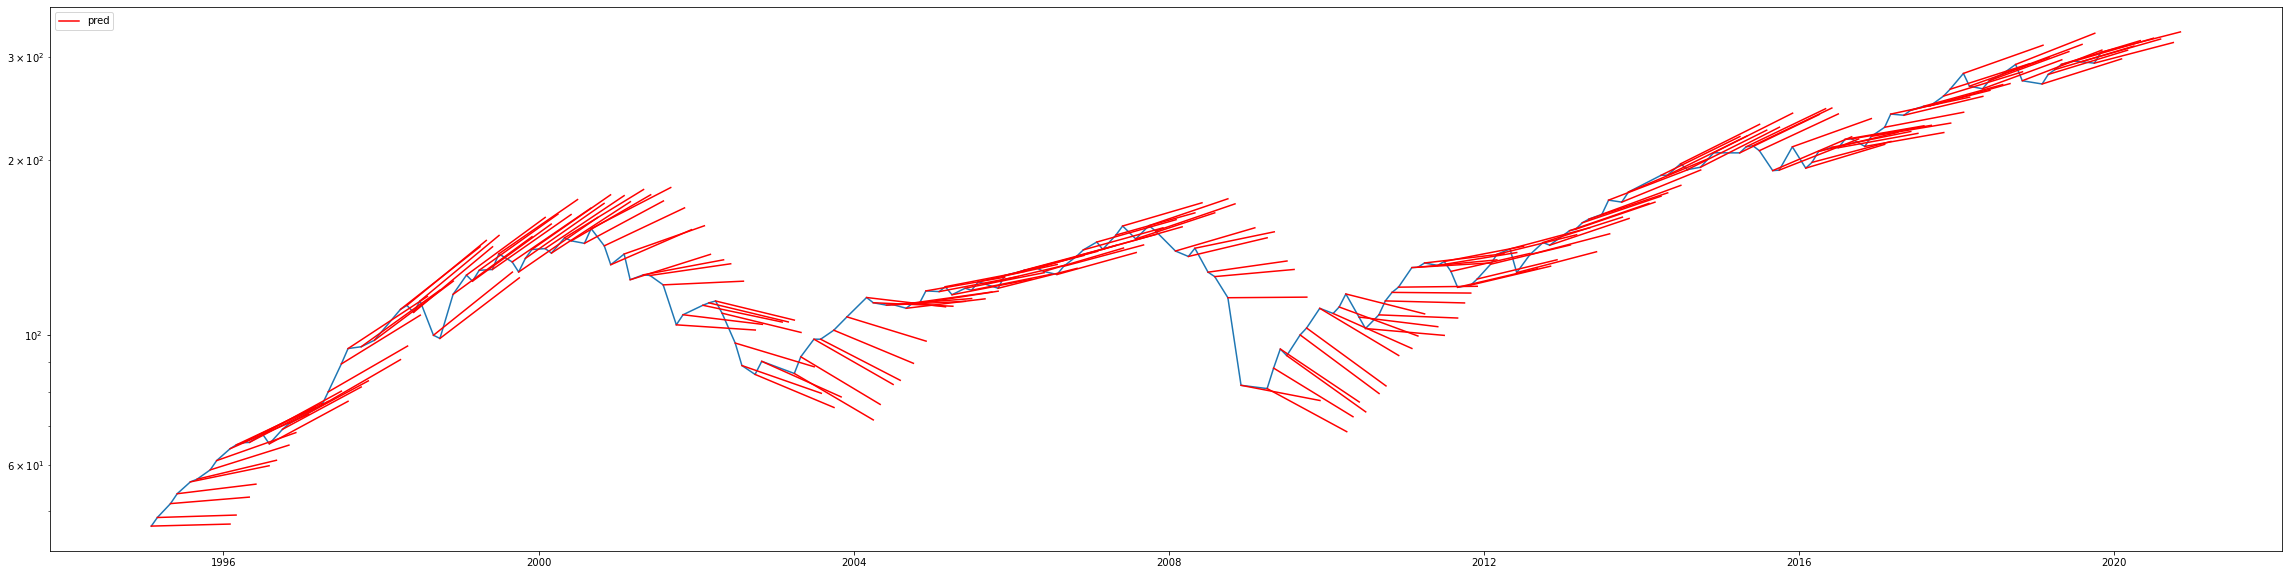

In [19]:
n_last = 1000

plotted_label = False

plt.figure(figsize=(40,10))
plt.yscale('log')
# plt.plot(envir._price_hist_df['date'][-n_last:], envir._price_hist_df['price'][-n_last:])
# plt.plot(envir._price_hist_df['date'][-n_last:], envir._price_hist_df['price_MA200'][-n_last:])
# plt.plot(envir._price_hist_df['date'][-n_last:], envir._price_hist_df['price_MA50'][-n_last:])

plt.plot(temp_df['date'], temp_df['price']) # temp_df['profit_mean']
for ind, row in temp_df.iterrows():
    date = row['date']
    date_next = row['date_next']
    
    price_cur = row['price']
    price_next = row['profit_mean']*row['price']
    price_next_real = row['price_next']
    
    
    plt.plot([date, date_next], [price_cur, price_next], c='red', label = None if plotted_label else 'pred')
    # plt.plot([date, date_next], [price_cur, price_next_real], c='green', label = None if plotted_label else'real')
    
    if ~plotted_label:
        plotted_label = True
    
plt.legend(loc='upper left')
plt.show()


In [20]:
temp_df

,date,instr_id,profit_mean,total_1,profit_std,total_2,price,profit,price_next,date_next
0,1995-02-01,SPY,1.008028,1.008028,1.024191,0.996052,47.078125,1.357451,63.906250,1996-02-01
1,1995-03-01,SPY,1.009693,1.009693,1.023953,0.997814,48.703125,1.311517,63.875000,1996-02-29
2,1995-05-01,SPY,1.025926,1.025926,1.043721,1.004209,51.453125,1.270878,65.390625,1996-04-30
3,1995-06-01,SPY,1.03859,1.03859,1.057336,1.010038,53.500000,1.250000,66.875000,1996-05-31
4,1995-08-01,SPY,1.065826,1.065826,1.081849,1.024715,56.062500,1.143255,64.093750,1996-07-31
...,...,...,...,...,...,...,...,...,...,...
186,2019-05-01,SPY,1.098212,1.098212,1.076622,1.058411,291.809998,0.969090,282.790009,2020-05-01
187,2019-07-01,SPY,1.094386,1.094386,1.074135,1.055945,295.660004,1.050260,310.519989,2020-07-01
188,2019-08-01,SPY,1.093775,1.093775,1.072362,1.056228,294.839996,1.115147,328.790009,2020-08-03
189,2019-10-01,SPY,1.08476,1.08476,1.074163,1.046643,293.239990,1.149366,337.040009,2020-10-01


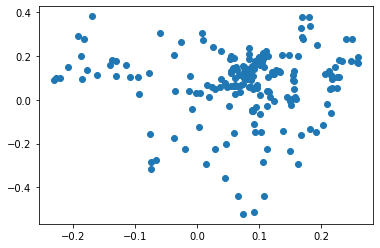

In [21]:
temp_df['profit_mean'] = temp_df['profit_mean'].astype(float)
plt.scatter(np.log(temp_df['profit_mean']), np.log((temp_df['profit'])))

In [22]:
temp_df['profit_pred_mean'] = temp_df['profit_mean']

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr

def get_metricks(data_pd, target):
    metricks_pd = pd.DataFrame(columns=['dataset', 'model', 'bias', 'wape', 'mae', 'r2', 'corr'])
    
    for model_name in ['mean']: #'prophet' 'total'
        bias = (data_pd[target+'_pred_'+model_name].sum() - data_pd[target].sum())/data_pd[target].sum()
        wape = sum(np.abs(data_pd[target] - data_pd[target+'_pred_'+model_name])/sum(data_pd[target]))
        mae = mean_absolute_error(data_pd[target], data_pd[target+'_pred_'+model_name])
        rmse = mean_squared_error(data_pd[target], data_pd[target+'_pred_'+model_name])**0.5
        r2 = r2_score(data_pd[target], data_pd[target+'_pred_'+model_name])
        corr = pearsonr(temp_df['profit_pred_mean'], temp_df['profit'])[0]
        metricks_pd = metricks_pd.append({'model': model_name, 'dataset': 'test', 'bias': bias, 'wape': wape, 'mae': mae, 'r2': r2, 'corr': corr}, ignore_index=True) #, 'rmse': rmse
    
    return metricks_pd
metricks_pd = get_metricks(
    temp_df,
    'profit'
)

metricks_pd

,dataset,model,bias,wape,mae,r2,corr
0,test,mean,-0.003507,0.134994,0.146423,-0.43726,0.021146


In [24]:
def preprocess(self, price_hist_temp_df):

    # Непосредственный рассчёт показателей
    price_hist_temp_df["price_next"] = price_hist_temp_df["price"].shift(
        -self.horizon_days
    )  # сдвигаем в обратную сторону, т.к. датасет отсортирован по убиванию даты

    price_hist_temp_df = price_hist_temp_df[
        price_hist_temp_df["price_next"].notnull()
        # & (price_hist_temp_df.index >= price_hist_temp_df.index.max() - 2 * (self.min_hist_days + self.min_rent_days))
    ]  # Берётся максимальная история в 2 раза длиннее минимальной

    # рассчитываем доходность на горизонт вперёд
    price_hist_temp_df["profit"] = price_hist_temp_df["price_next"] / price_hist_temp_df["price"]
    return price_hist_temp_df


In [25]:
# gather
price_hist_temp_df = agent.gather(instr_id='SPY')

price_hist_temp_df = price_hist_temp_df.sort_values(by="date").reset_index(drop=True)

 # preprocess
price_hist_temp_df = preprocess(agent, price_hist_temp_df)

price_hist_temp_df['price_MA200'] = price_hist_temp_df['price'].rolling(200).mean()
price_hist_temp_df['price_MA50'] = price_hist_temp_df['price'].rolling(50).mean()


price_hist_temp_df

,date,instr_id,price,volume,open,high,low,close,adj_close,price_next,profit,price_MA200,price_MA50
0,1993-01-29,SPY,43.937500,1003200,43.968750,43.968750,43.750000,43.937500,25.547983,47.875000,1.089616,NaN,NaN
1,1993-02-01,SPY,44.250000,480500,43.968750,44.250000,43.968750,44.250000,25.729681,48.218750,1.089689,NaN,NaN
2,1993-02-02,SPY,44.343750,201300,44.218750,44.375000,44.125000,44.343750,25.784195,47.968750,1.081748,NaN,NaN
3,1993-02-03,SPY,44.812500,529400,44.406250,44.843750,44.375000,44.812500,26.056763,48.281250,1.077406,NaN,NaN
4,1993-02-04,SPY,45.000000,531500,44.968750,45.093750,44.468750,45.000000,26.165779,48.062500,1.068056,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6522,2018-12-21,SPY,240.699997,255345600,246.740005,249.710007,239.979996,240.699997,228.137039,321.230011,1.334566,275.12680,269.120400
6523,2018-12-24,SPY,234.339996,147311600,239.039993,240.839996,234.270004,234.339996,222.108948,322.940002,1.378083,274.90415,268.363800
6524,2018-12-26,SPY,246.179993,218485400,235.970001,246.179993,233.759995,246.179993,233.330994,322.859985,1.311479,274.74245,267.768399
6525,2018-12-27,SPY,248.070007,186267300,242.570007,248.289993,238.960007,248.070007,235.122345,321.079987,1.294312,274.59920,267.241800


In [26]:
price_hist_temp_df['profit_MA200'] = price_hist_temp_df['profit'].rolling(200).mean()
price_hist_temp_df['profit_MA50'] = price_hist_temp_df['profit'].rolling(50).mean()

price_hist_temp_df['year_day'] = price_hist_temp_df['date'].dt.dayofyear
price_hist_temp_df['month_day'] = price_hist_temp_df['date'].dt.day
price_hist_temp_df['week_day'] = price_hist_temp_df['date'].dt.dayofweek

In [27]:
# fit
print('envir.date:                ', envir.date)
print('agent.price_hist_df.max(): ', price_hist_temp_df["date"].max())
date_max = price_hist_temp_df["date"].max()
price_hist_temp_df["diff_day"] = (price_hist_temp_df["date"].apply(lambda x: x - date_max)).dt.days
agent.den_pow = 365
price_hist_temp_df['power'] = -price_hist_temp_df['diff_day'] / agent.den_pow
price_hist_temp_df["weight"] = 0.5 ** price_hist_temp_df["power"]  # за den_pow вес строки падает до 0.5
price_hist_temp_df

envir.date:                 2020-01-01 00:00:00
agent.price_hist_df.max():  2018-12-28 00:00:00


,date,instr_id,price,volume,open,high,low,close,adj_close,price_next,...,price_MA200,price_MA50,profit_MA200,profit_MA50,year_day,month_day,week_day,diff_day,power,weight
0,1993-01-29,SPY,43.937500,1003200,43.968750,43.968750,43.750000,43.937500,25.547983,47.875000,...,NaN,NaN,NaN,NaN,29,29,4,-9464,25.928767,1.565537e-08
1,1993-02-01,SPY,44.250000,480500,43.968750,44.250000,43.968750,44.250000,25.729681,48.218750,...,NaN,NaN,NaN,NaN,32,1,0,-9461,25.920548,1.574482e-08
2,1993-02-02,SPY,44.343750,201300,44.218750,44.375000,44.125000,44.343750,25.784195,47.968750,...,NaN,NaN,NaN,NaN,33,2,1,-9460,25.917808,1.577474e-08
3,1993-02-03,SPY,44.812500,529400,44.406250,44.843750,44.375000,44.812500,26.056763,48.281250,...,NaN,NaN,NaN,NaN,34,3,2,-9459,25.915068,1.580473e-08
4,1993-02-04,SPY,45.000000,531500,44.968750,45.093750,44.468750,45.000000,26.165779,48.062500,...,NaN,NaN,NaN,NaN,35,4,3,-9458,25.912329,1.583477e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6522,2018-12-21,SPY,240.699997,255345600,246.740005,249.710007,239.979996,240.699997,228.137039,321.230011,...,275.12680,269.120400,1.076162,1.153142,355,21,4,-7,0.019178,9.867947e-01
6523,2018-12-24,SPY,234.339996,147311600,239.039993,240.839996,234.270004,234.339996,222.108948,322.940002,...,274.90415,268.363800,1.078008,1.158741,358,24,0,-4,0.010959,9.924326e-01
6524,2018-12-26,SPY,246.179993,218485400,235.970001,246.179993,233.759995,246.179993,233.330994,322.859985,...,274.74245,267.768399,1.079518,1.163344,360,26,2,-2,0.005479,9.962091e-01
6525,2018-12-27,SPY,248.070007,186267300,242.570007,248.289993,238.960007,248.070007,235.122345,321.079987,...,274.59920,267.241800,1.080906,1.167417,361,27,3,-1,0.002740,9.981028e-01


In [28]:
timestamp_max = price_hist_temp_df['date'].max()
timestamp_split = timestamp_max - pd.DateOffset(28)
timestamp_split_2 = timestamp_split - pd.DateOffset(28)

data_train_df = price_hist_temp_df[price_hist_temp_df["date"] <= timestamp_split_2]
data_val_df = price_hist_temp_df[(price_hist_temp_df["date"] <= timestamp_split)&(price_hist_temp_df["date"] > timestamp_split_2)]



data_test_df = price_hist_temp_df[price_hist_temp_df["date"] > timestamp_split]
print(data_train_df['date'].min(), data_train_df['date'].max())
print(data_val_df['date'].min(), data_val_df['date'].max())
print(data_test_df['date'].min(), data_test_df['date'].max())

1993-01-29 00:00:00 2018-11-02 00:00:00
2018-11-05 00:00:00 2018-11-30 00:00:00
2018-12-03 00:00:00 2018-12-28 00:00:00


In [37]:
class Conf():
    def __init__(self):
        pass    
    features = [
        'year_day',
        'month_day',
        'week_day',
        'profit_MA50', 
        'profit_MA200'
    ]
    target = 'profit'

    monotone_constraints = [
        0,  # "provider_id",
        0,  # 'couriers_online',
        0,  # 'couriers_matched',
    ]

    model_params = {
        "boosting_type": "gbdt",
        "objective": "mse",
        "num_iterations": 1000,
        # "num_leaves": 40,
        "learning_rate": 0.01,
        "lambda_l2": 1.0,
        # "verbose": 0,
        # "reg_sqrt": True,
        # "min_data_in_leaf": 20,
        # "min_data_in_bin": 20,
        # "min_data": 20,
        # "alpha": 0.5,
        # "max_depth": 60,
        # "monotone_constraints": monotone_constraints,
    }
    
    
conf = Conf()
conf.features

['year_day', 'month_day', 'week_day', 'profit_MA50', 'profit_MA200']

In [38]:
import lightgbm as lgb


eval_result = {}
callbacks = [lgb.record_evaluation(eval_result)]


def train_model_lgb(
    train_df: pd.DataFrame,
    features: list,
    target: str,
    val_df: pd.DataFrame = None,
    hyperparameters: dict = None,
):
    dataset_train = lgb.Dataset(
        train_df[features],
        train_df[target],
        # weight=train_df["sample_weight"],
        # categorical_feature=["provider_id", "item_id", "cat_id"],
    )

    dataset_val = None
    early_stopping_rounds = None
    if val_df is not None:
        dataset_val = lgb.Dataset(
            val_df[features],
            val_df[target],
            # weight=val_df["sample_weight"],
            # categorical_feature=["provider_id", "item_id", "cat_id"],
        )
        early_stopping_rounds = 100

    model = lgb.train(
        hyperparameters,
        dataset_train,
        valid_sets=dataset_val,
        num_boost_round=hyperparameters.get("num_iterations", 1000),
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=0,
        
        
        
        callbacks=callbacks,
        
    )

    return model


model_lgb = train_model_lgb(
    train_df=data_train_df,
    features=conf.features,
    target=conf.target,
    val_df=data_val_df,
    hyperparameters=conf.model_params,
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 6490, number of used features: 5
[LightGBM] [Info] Start training from score 1.087957


In [39]:
data_train_df

,date,instr_id,price,volume,open,high,low,close,adj_close,price_next,...,price_MA200,price_MA50,profit_MA200,profit_MA50,year_day,month_day,week_day,diff_day,power,weight
0,1993-01-29,SPY,43.937500,1003200,43.968750,43.968750,43.750000,43.937500,25.547983,47.875000,...,NaN,NaN,NaN,NaN,29,29,4,-9464,25.928767,1.565537e-08
1,1993-02-01,SPY,44.250000,480500,43.968750,44.250000,43.968750,44.250000,25.729681,48.218750,...,NaN,NaN,NaN,NaN,32,1,0,-9461,25.920548,1.574482e-08
2,1993-02-02,SPY,44.343750,201300,44.218750,44.375000,44.125000,44.343750,25.784195,47.968750,...,NaN,NaN,NaN,NaN,33,2,1,-9460,25.917808,1.577474e-08
3,1993-02-03,SPY,44.812500,529400,44.406250,44.843750,44.375000,44.812500,26.056763,48.281250,...,NaN,NaN,NaN,NaN,34,3,2,-9459,25.915068,1.580473e-08
4,1993-02-04,SPY,45.000000,531500,44.968750,45.093750,44.468750,45.000000,26.165779,48.062500,...,NaN,NaN,NaN,NaN,35,4,3,-9458,25.912329,1.583477e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6485,2018-10-29,SPY,263.859985,160749100,268.799988,270.250000,259.850006,263.859985,248.636246,303.329987,...,276.326549,285.0194,1.043875,1.041133,302,29,0,-60,0.164384,8.923097e-01
6486,2018-10-30,SPY,267.769989,157116000,263.670013,268.119995,263.119995,267.769989,252.320709,306.140015,...,276.280549,284.6614,1.044845,1.043531,303,30,1,-59,0.161644,8.940058e-01
6487,2018-10-31,SPY,270.630005,128296300,270.649994,273.230011,270.119995,270.630005,255.015701,307.369995,...,276.235649,284.3472,1.045759,1.046350,304,31,2,-58,0.158904,8.957052e-01
6488,2018-11-01,SPY,273.510010,99495000,271.600006,273.730011,270.380005,273.510010,257.729523,307.029999,...,276.207499,284.0940,1.046663,1.048673,305,1,3,-57,0.156164,8.974078e-01


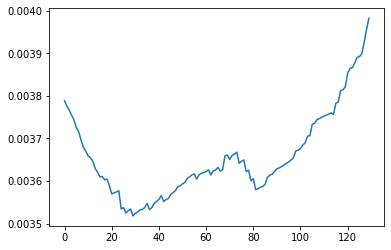

In [40]:
plt.plot(eval_result['valid_0']['l2'])

In [41]:
model_lgb.best_iteration

30

In [42]:
def predict_lgb(model, df_data, features):
    prediction = model.predict(df_data[features], num_threads=1)
    prediction = np.maximum(0.0, prediction)
    return prediction


prediction_train = predict_lgb(model=model_lgb, df_data=data_train_df, features=conf.features)
prediction_val = predict_lgb(model=model_lgb, df_data=data_val_df, features=conf.features)

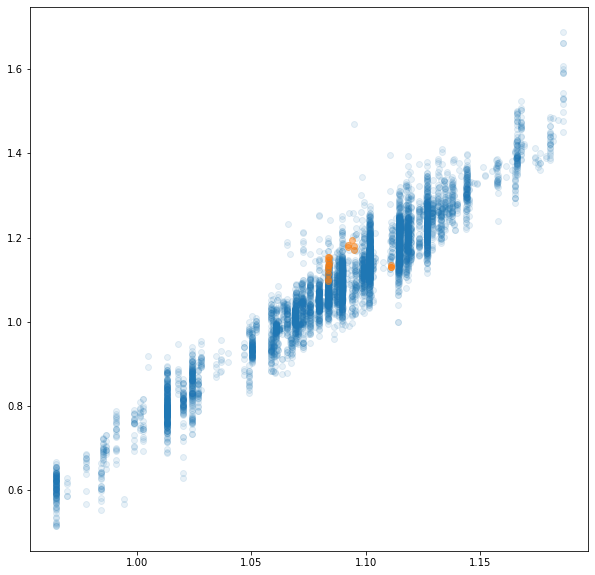

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(prediction_train, data_train_df['profit'], alpha = 0.1)
plt.scatter(prediction_val, data_val_df['profit'], alpha = 0.5)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

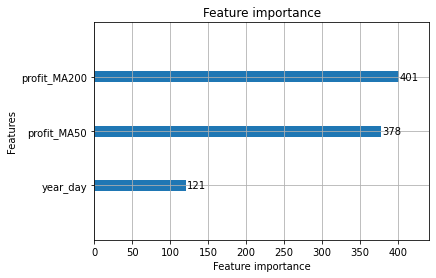

In [44]:
lgb.plot_importance(model_lgb)